# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [132]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))
print(cell_phones.head(), '\n')
print(population.head(), '\n')
print(geo_country_codes.head())

   geo  time  cell_phones_total
0  abw  1960                0.0
1  abw  1965                0.0
2  abw  1970                0.0
3  abw  1975                0.0
4  abw  1976                0.0 

   geo  time  population_total
0  afg  1800           3280000
1  afg  1801           3280000
2  afg  1802           3280000
3  afg  1803           3280000
4  afg  1804           3280000 

    geo alt_5                    alternative_1 alternative_2 alternative_3  \
0  abkh   NaN                              NaN           NaN           NaN   
1   abw   NaN                              NaN           NaN           NaN   
2   afg   NaN  Islamic Republic of Afghanistan           NaN           NaN   
3   ago   NaN                              NaN           NaN           NaN   
4   aia   NaN                              NaN           NaN           NaN   

  alternative_4_cdiac arb1 arb2 arb3 arb4  ... latitude longitude  \
0                 NaN  NaN  NaN  NaN  NaN  ...      nan       nan   
1          

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [133]:
merged = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])
print(merged.head())
print(merged.shape)

   geo  time  cell_phones_total  population_total
0  afg  1960                0.0           8996351
1  afg  1965                0.0           9938414
2  afg  1970                0.0          11126123
3  afg  1975                0.0          12590286
4  afg  1976                0.0          12840299
(8590, 4)


In [134]:
g = geo_country_codes

#memeory inefficient way to drop specific columns for merge

drop_these = list(g.columns.values)
keep_these = ['geo', 'country']

column=[i for i in drop_these if i not in  keep_these] 

print(column)

countries = g.drop(columns=column)
countries.head()

['alt_5', 'alternative_1', 'alternative_2', 'alternative_3', 'alternative_4_cdiac', 'arb1', 'arb2', 'arb3', 'arb4', 'arb5', 'arb6', 'g77_and_oecd_countries', 'gapminder_list', 'god_id', 'gwid', 'income_groups', 'is--country', 'iso3166_1_alpha2', 'iso3166_1_alpha3', 'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude', 'main_religion_2008', 'pandg', 'un_state', 'unicode_region_subtag', 'upper_case_name', 'world_4region', 'world_6region']


geo      country
0  abkh     Abkhazia
1   abw        Aruba
2   afg  Afghanistan
3   ago       Angola
4   aia     Anguilla

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [135]:
merged = pd.merge(merged, countries, how='inner', on=['geo'])
print(merged.head())
print(merged.shape)



   geo  time  cell_phones_total  population_total      country
0  afg  1960                0.0           8996351  Afghanistan
1  afg  1965                0.0           9938414  Afghanistan
2  afg  1970                0.0          11126123  Afghanistan
3  afg  1975                0.0          12590286  Afghanistan
4  afg  1976                0.0          12840299  Afghanistan
(8590, 5)


In [136]:
df = merged
print(df.head())


   geo  time  cell_phones_total  population_total      country
0  afg  1960                0.0           8996351  Afghanistan
1  afg  1965                0.0           9938414  Afghanistan
2  afg  1970                0.0          11126123  Afghanistan
3  afg  1975                0.0          12590286  Afghanistan
4  afg  1976                0.0          12840299  Afghanistan


In [137]:
df = df.rename(columns={
    'time': 'year',
    'population_total': 'population'
})

In [138]:
print(df.head())

   geo  year  cell_phones_total  population      country
0  afg  1960                0.0     8996351  Afghanistan
1  afg  1965                0.0     9938414  Afghanistan
2  afg  1970                0.0    11126123  Afghanistan
3  afg  1975                0.0    12590286  Afghanistan
4  afg  1976                0.0    12840299  Afghanistan


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [139]:
df['cell_phones_per_person'] = df['cell_phones_total'].div(df['population'])

In [140]:
usa = df[df.country == 'United States']
usa[usa.year.isin([2017])]

geo  year  cell_phones_total  population        country  \
8134  usa  2017      395,881,000.0   324459463  United States   

      cell_phones_per_person  
8134      1.2201246847283354

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [141]:
df['geo'].str.title()

0       Afg
1       Afg
2       Afg
3       Afg
4       Afg
       ... 
8585    Zwe
8586    Zwe
8587    Zwe
8588    Zwe
8589    Zwe
Name: geo, Length: 8590, dtype: object

In [142]:
df2 = df

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [143]:
df.describe()

year    cell_phones_total           population  \
count             8,590.0              8,590.0              8,590.0   
mean  1,994.1934807916182  9,004,949.642905472 29,838,230.581722934   
std    14.257974607310278 55,734,084.872176506 116,128,377.47477297   
min               1,960.0                  0.0              4,433.0   
25%               1,983.0                  0.0          1,456,148.0   
50%               1,995.0              6,200.0          5,725,062.5   
75%               2,006.0          1,697,652.0         18,105,812.0   
max               2,017.0      1,474,097,000.0      1,409,517,397.0   

       cell_phones_per_person  
count                 8,590.0  
mean      0.27963855580591535  
std       0.45424665621404714  
min                       0.0  
25%                       0.0  
50%     0.0015636266438163813  
75%        0.4611491855201403  
max         2.490242818521353

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [144]:
# This optional code formats float numbers with comma separators

pd.options.display.float_format = '{:,}'.format

In [145]:
pd.options.display.max_rows = 500

print(df[df.year.isin([2017])].nlargest(5,'cell_phones_total'))

      geo  year  cell_phones_total  population        country  \
1496  chn  2017    1,474,097,000.0  1409517397          China   
3595  ind  2017    1,168,902,277.0  1339180127          India   
3549  idn  2017      458,923,202.0   263991379      Indonesia   
8134  usa  2017      395,881,000.0   324459463  United States   
1084  bra  2017      236,488,548.0   209288278         Brazil   

      cell_phones_per_person  
1496      1.0458168186766978  
3595      0.8728491809526382  
3549       1.738402230172827  
8134      1.2201246847283354  
1084      1.1299655683535224  


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [146]:
#print(usa.head())
#print(usa.shape)

#finding values where cell phone total exceeds population

print(usa.population.gt(usa.cell_phones_total), '\n')

print(usa.loc[8130], '\n')
print(usa.loc[8131], '\n')

#answer == 2014

8092     True
8093     True
8094     True
8095     True
8096     True
8097     True
8098     True
8099     True
8100     True
8101     True
8102     True
8103     True
8104     True
8105     True
8106     True
8107     True
8108     True
8109     True
8110     True
8111     True
8112     True
8113     True
8114     True
8115     True
8116     True
8117     True
8118     True
8119     True
8120     True
8121     True
8122     True
8123     True
8124     True
8125     True
8126     True
8127     True
8128     True
8129     True
8130     True
8131    False
8132    False
8133    False
8134    False
dtype: bool 

geo                                     usa
year                                   2013
cell_phones_total             310,698,000.0
population                        315536676
country                       United States
cell_phones_per_person   0.9846652501340288
Name: 8130, dtype: object 

geo                                    usa
year                                  2014
cell_p

### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [147]:
ind = ['China', 'India', 'United States', 'Indonesia', 'Brazil']
years =[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

df.loc[df['country'].isin(ind) & df['year'].isin(years)]
          
table = pd.pivot_table(df.loc[df['country'].isin(ind) & df['year'].isin(years)], index=['country'], columns=['year'], values=['cell_phones_total'])
print(table.head())



              cell_phones_total                                            \
year                       2007          2008          2009          2010   
country                                                                     
Brazil            120,980,103.0 150,641,403.0 169,385,584.0 196,929,978.0   
China             547,306,000.0 641,245,000.0 747,214,000.0 859,003,000.0   
India             233,620,000.0 346,890,000.0 525,090,000.0 752,190,000.0   
Indonesia          93,386,881.0 140,578,243.0 163,676,961.0 211,290,235.0   
United States     249,300,000.0 261,300,000.0 274,283,000.0 285,118,000.0   

                                                                             \
year                   2011            2012            2013            2014   
country                                                                       
Brazil        234,357,507.0   248,323,703.0   271,099,799.0   280,728,796.0   
China         986,253,000.0 1,112,155,000.0 1,229,113,000.0 1,286,0

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df4 = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df4['Occupation'] = df4['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [ ]:
pd.crosstabs()

### Part 2 — Recreate this explanatory visualization:

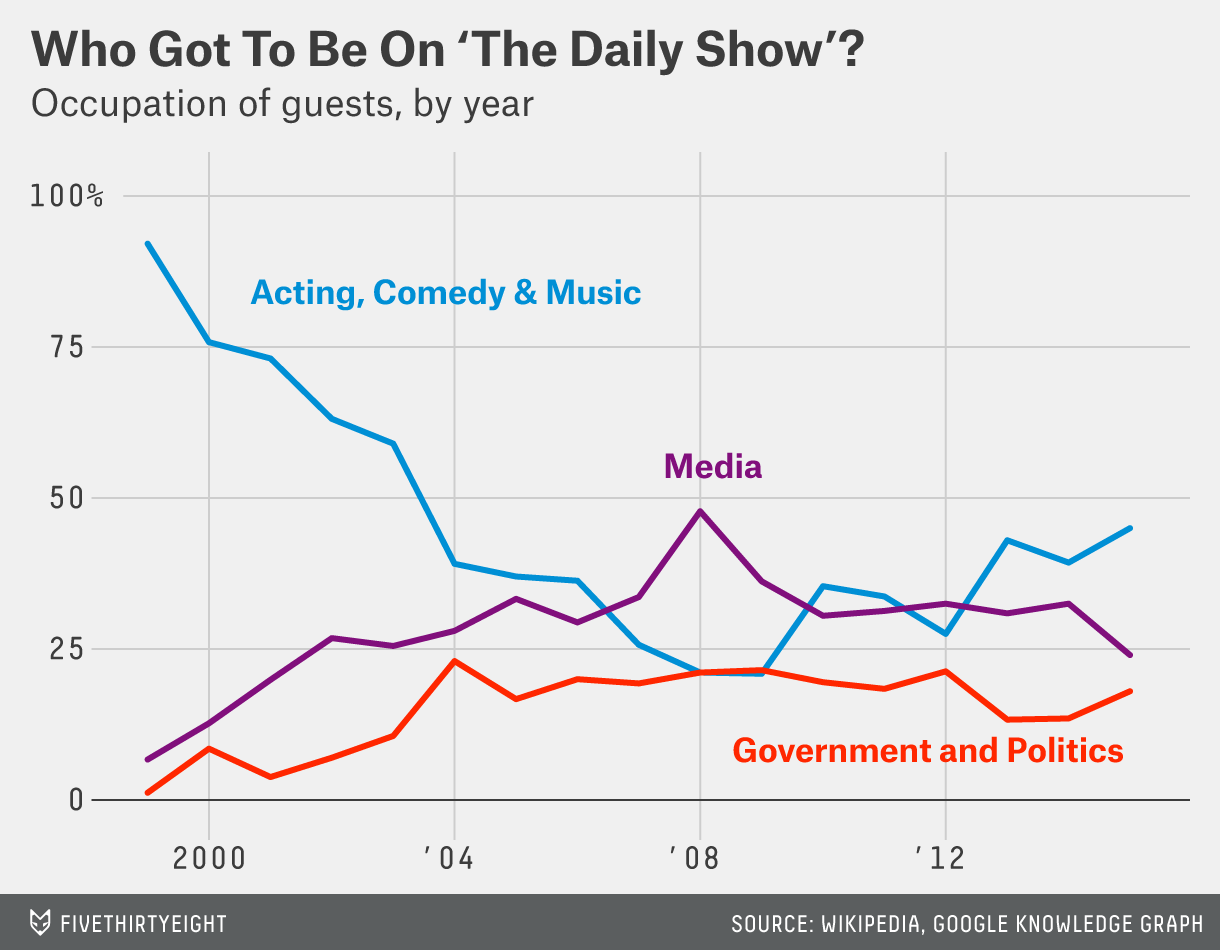

In [149]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.